### This script was used when developing the 'build_model' function.  

Here we develop the steps necessary to subsample/interpolate the variables in a IsophoteList. This is a necessary step before running the loop in the build_model function, to ensure the pixel array will be covered without leaving gaps in between successive ellipses. 

In [1]:
from astropy.io import fits
from ellipse.ellipse import Ellipse

image_data = fits.open("../../test/data/M51.fits")
image = image_data[0].data
ellipse = Ellipse(image)
isolist = ellipse.fit_image(sclip=2., nclip=3)

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1094.42 ( 8.44)  0.111 (0.007)  64.68 ( 1.7)  0.190    58     1   20     0
  11.00     1048.76 ( 7.36)  0.163 (0.005)  62.35 ( 1.0)  0.164    59     4   10     0
  12.10      989.97 ( 6.35)  0.163 (0.003)  72.48 ( 0.6)  0.116    62     7   10     0
  13.31      924.37 ( 6.97)  0.181 (0.004)  63.62 ( 0.7)  0.152    70     5   13     0
  14.64      895.86 ( 7.22)  0.139 (0.005)  25.70 ( 1.0)  0.164    78     7   18     0
  16.11      871.67 ( 7.69)  0.200 (0.004)  33.95 ( 0.6)  0.143    82     8   19     0
  17.72      764.53 ( 5.34)  0.053 (0.003)  39.51 ( 1.1)  0.092    85    23   24     0
  19.49      728.14 ( 4.55)  0.1

Now we interpolate using univariate splines. This should approximate what the old STSDAS task did.

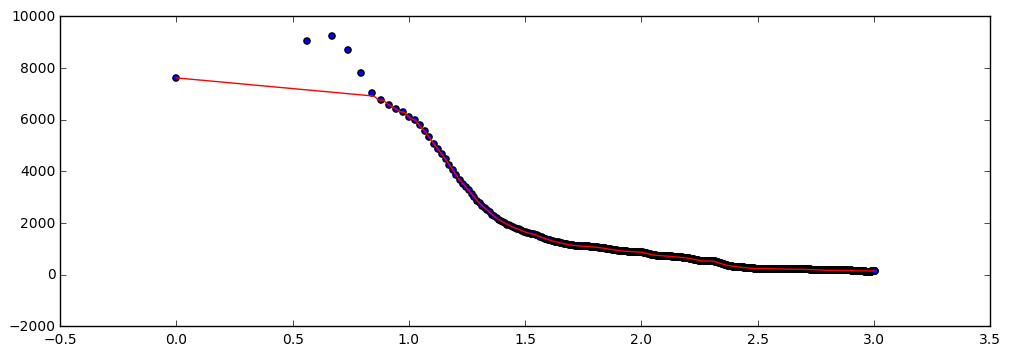

In [18]:
from scipy.interpolate import UnivariateSpline 
import numpy as np

interpolator = UnivariateSpline(isolist.sma, isolist.intens, s=0.04*len(isolist.sma))

finely_spaced_sma = np.arange(isolist[0].sma, isolist[-1].sma, 0.1)

intens = interpolator(finely_spaced_sma)

import matplotlib.pyplot as plt
%matplotlib inline

plt.gcf().set_size_inches(12.,4.)
plt.plot(isolist.sma**0.25, isolist.intens, 'red')
plt.scatter(finely_spaced_sma**0.25, intens)